In [9]:
from pso.pso import PSO
import matplotlib.pyplot as plt
import numpy as np

dim = 4
p_num = 20
x_min, x_max = -30, 30
v_min, v_max = -60, 60

PSO_Algorithm = PSO(C1 = 2, 
                    C2 = 2, 
                    Omega = 1,
                    dim = dim,
                    p_num = p_num, 
                    x_min = x_min, 
                    x_max = x_max, 
                    v_min = v_min, 
                    v_max = v_max
                )
for par in PSO_Algorithm.particles:
    print(f'particle init pos is {par.get_pos()}')
max_iter = 10000

def cal_fitness(x):
    return np.sum(x**2)
    return sum(100.0 * (x[0][1:] - x[0][:-1] ** 2.0) ** 2.0 + (1 - x[0][:-1]) ** 2.0)

for i in range(max_iter):
    print(f'iter is {i+1}, fitness is {cal_fitness(PSO_Algorithm.g_best)}')
    PSO_Algorithm.update(cal_fitness)

particle init pos is [[-11.03352805 -25.96886715 -25.44191541  19.22787765]]
particle init pos is [[ 22.21761345  24.38756142 -22.50075673  29.26381774]]
particle init pos is [[-12.11085179  28.73244359  14.9175922   22.46048064]]
particle init pos is [[ 8.92842914 12.44181557 24.09087767 21.84758798]]
particle init pos is [[-23.270072   -18.31469218 -24.47902007   3.14411598]]
particle init pos is [[ 14.12953822  -7.41213616 -16.0366768    6.99117763]]
particle init pos is [[ 10.43207316  11.32663517 -20.73671002 -10.6524854 ]]
particle init pos is [[21.05927228 21.59878476  2.3355272   9.42742488]]
particle init pos is [[-19.22555008 -13.65875542 -12.0451325  -27.51128233]]
particle init pos is [[-28.70050992  26.70254642  27.23790692   5.09524074]]
particle init pos is [[ -6.02851262 -24.68155134 -27.17805563 -15.26420637]]
particle init pos is [[-29.81638192   0.92128441  -6.10342392   7.51859559]]
particle init pos is [[ 5.34636663 19.09514845 12.63871611  5.98388645]]
particle in

In [10]:
PSO_Algorithm.g_best

array([[0.00415636, 0.00042129, 0.00046673, 0.00214517]])

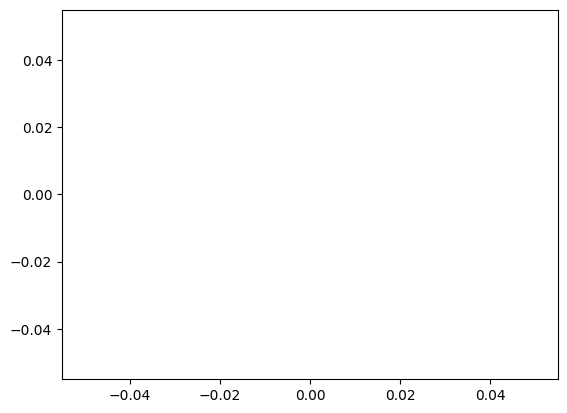

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation   #导入负责绘制动画的接口
#其中需要输入一个更新数据的函数来为fig提供新的绘图信息

fig, ax = plt.subplots()          #生成轴和fig,  可迭代的对象
x, y= [], []    #用于接受后更新的数据
line, = plt.plot([], [], '.-')   #绘制线对象，plot返回值类型，要加逗号

#------说明--------#
#核心函数包含两个：
#一个是用于初始化画布的函数init()
#另一个是用于更新数据做动态显示的update()


def init():
	#初始化函数用于绘制一块干净的画布，为后续绘图做准备
    ax.set_xlim(-5, 15*np.pi)    #初始函数，设置绘图范围
    ax.set_ylim(-3, 3)
    return line

def update(step):           #通过帧数来不断更新新的数值
    x.append(step)
    y.append(np.cos(step/3)+np.sin(step**2))    #计算y
    line.set_data(x, y)
    return line

#fig 是绘图的画布
#update 为更新绘图的函数，step数值是从frames 传入
#frames 数值是用于动画每一帧的数据
ani = FuncAnimation(fig, update, frames=np.linspace(0, 13*np.pi, 128),
                    init_func=init,interval=20)

plt.show()


In [2]:
class PPO(object):
    def __init__(self,state_dim, act_dim, hidden_dims,layer_nums,train_params) -> None:
        self.ppo_params = {
            # 网络层参数
            'state_dim' : state_dim,
            'act_dim' : act_dim,
            'layer_nums' : layer_nums,

            # 训练参数
            'lr_a': train_params['lr_a'],
            'lr_c': train_params['lr_c'],
            'batch_size' : train_params['batch_size'],
            'on_policy' : False,
            'use_buffer' : False,
            'use_tanh' : train_params['use_tanh']
        }

        if not isinstance(hidden_dims,list) :
            raise RuntimeError(f"hidden_dims type must be list, now receive {type(hidden_dims)}. ")
        if len(hidden_dims) != layer_nums - 1:
            raise RuntimeError(f"hidden_dims'len expect {layer_nums-1}, but now receive {len(hidden_dims)}. ")
        

In [1]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: overtheriver861 (overtheriver861-bupt). Use `wandb login --relogin` to force relogin


acc,▁▆▇▆▇█▇█
loss,█▃▃▂▁▂▁▁
acc,0.87684
loss,0.16158


In [6]:
from torch.utils.data.sampler import BatchSampler, SubsetRandomSampler
for index in BatchSampler(range(1024), 64, False):
    print(index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]
[192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [55]:
import gym
# from share_func import make_env
# train_envs = [ make_env(env_name = "CartPole-v1", seed = 1,idx = i,capture_video = False, run_name = f'_video{i}') for i in range(1000) ]
def make_env(gym_id, seed, idx, capture_video, run_name):
    def thunk():
        env = gym.make(gym_id)
        env = gym.wrappers.RecordEpisodeStatistics(env)
        if capture_video:
            if idx == 0:
                env = gym.wrappers.RecordVideo(env, f"videos/{run_name}")
        env.action_space.seed(seed)
        env.observation_space.seed(seed)
        return env

    return thunk
train_envs = [ make_env(gym_id = "CartPole-v1", seed = 1,idx = i,capture_video = False, run_name = f'_video{i}') for i in range(10) ]
envs = gym.vector.SyncVectorEnv(train_envs)

In [58]:
gym.make("CartPole-v1")._max_episode_steps

500

In [62]:
envs.single_action_space.n

2

In [53]:
# env reset, state shape is (env_num, state_dim)
from ppo.ppo import PPO
import torch
import numpy as np
ppo_params = {
        # ppo algorithm params
        'clip_param' : 0.2,

        # 训练参数
        'lr_a': 1e-3,
        'lr_c': 1e-3,
        'gamma': 0.5,
        'lamda': 0.5,
        'batch_size' : 1024,
        'mini_batch_size': 64,

        # trick params

        'off_policy' : False, # use off-policy or on-policy
        'use_buffer' : True, # use buffer to store or not
        "use_ppo_clip":False , # use ppo clip param annealing
        "use_adv_norm" : True, # use advantage normalization
        "use_state_norm" : False, # use state normalization
        "use_reward_norm" : False, # use reward normalization
        'use_tanh' : False, # use tanh activate func or ReLU func
        'use_adv_norm' : False, # use advantage normalization
        'use_grad_clip' : True, # use grad clip in model params.
        'grad_clip_params': 0.5,
        'use_lr_decay': True,
        'entropy_coef': 0.1,
        'device': torch.device("cuda"),        
}
agent = PPO(state_dim = 4,act_dim = 2, hidden_dims = [64,64], layer_nums = 3, train_params = ppo_params)
state, _ = envs.reset()
done = np.full((10,1), False)
while np.sum(done) == 0:
    print(state, np.sum(done),sep="\t\t")
    action, a_logprob = agent.select_action(state)
    state_, reward, done, truncation, _ = envs.step(action)
    # replay_buffer.add(state = state, action = action, reward = reward, next_state = state_, a_logprob = a_logprob, done = done)
    if np.sum(done) == envs.action_space.nvec.shape[0] :
        print(f'done is {done}')
        print(f'state shape is {state_.shape}, \nstate is {state_}')
    state = state_
    

[[ 0.02053587  0.0236043   0.01065993 -0.01695622]
 [-0.04825522  0.0354924   0.04079692  0.02904986]
 [-0.0481659  -0.01102298 -0.01037105 -0.03539612]
 [ 0.04087397 -0.04533185  0.02746162  0.02488187]
 [-0.03371378 -0.00106242 -0.02406038  0.02826177]
 [-0.03925041  0.01939617  0.02954323  0.0442635 ]
 [ 0.01972099  0.01137588  0.00713718  0.04405032]
 [-0.03130857  0.04496255 -0.02974506 -0.03972564]
 [ 0.03801744 -0.0486947  -0.04582679  0.04576951]
 [-0.04172057 -0.01451814 -0.03087957 -0.00490773]]		0
[[ 0.02100795 -0.17166889  0.01032081  0.27907088]
 [-0.04754537  0.23000628  0.04137791 -0.2504872 ]
 [-0.04838636  0.18424615 -0.01107898 -0.3313331 ]
 [ 0.03996733  0.14938574  0.02795926 -0.2590117 ]
 [-0.03373503 -0.19583121 -0.02349514  0.31325734]
 [-0.03886249  0.2140823   0.0304285  -0.23895381]
 [ 0.0199485  -0.1838477   0.00801818  0.33897653]
 [-0.03040932  0.24049813 -0.03053958 -0.34164304]
 [ 0.03704355  0.1470534  -0.0449114  -0.26101273]
 [-0.04201093 -0.20918393 -

In [54]:
done

array([False, False, False, False, False, False, False,  True, False,
        True])

In [10]:
envs.single_action_space.shape

()

In [11]:
np.full()

(10, 10, 1, 2)

In [23]:
state, _ = envs.reset()

In [26]:
state.shape

(1000, 4)

In [18]:
async_env = gym.vector.AsyncVectorEnv(train_envs)

In [19]:
async_env.reset()

(array([[ 0.02295855, -0.04020345, -0.00184459, -0.01650787],
        [ 0.02532726,  0.03144827,  0.02084922,  0.03828781],
        [-0.00499851, -0.01169648, -0.00101552, -0.00899364],
        [-0.04016056, -0.00532141, -0.0131412 , -0.0055244 ],
        [-0.00059627, -0.01366519,  0.0462283 ,  0.01514791],
        [-0.00352161,  0.03013887, -0.02337307,  0.01134107],
        [-0.02305294,  0.04976821, -0.02640576, -0.01472009],
        [-0.0033684 ,  0.01203468,  0.04347322, -0.02861447],
        [ 0.0316693 ,  0.00551981,  0.03895865,  0.01330002],
        [ 0.00576373,  0.0437409 , -0.02494426, -0.01491221]],
       dtype=float32),
 {})